In [17]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Read the CSV file
df = pd.read_csv('train_transaction.csv')

# Show the contents
df.head()
df = df.fillna(0)

In [4]:
print(df.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean     9898.734658     357.071172     152.788941     197.841689   
std      4901.170153     162.727883      13.791462      44.420452   
min      1000.000000       0.000000       0.000000       0.000000   
25%      6019.000000    

In [5]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['TransactionAmt'] + ['V%d' % number for number in range(1, 339)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'isFraud'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = df[features]
y = df[target]

# Visualization of some of the features

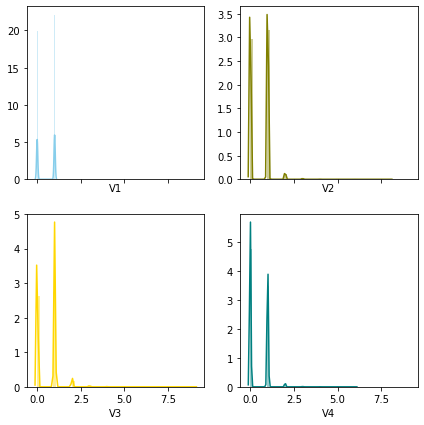

In [10]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["V1"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["V2"] , color="olive", ax=axes[0, 1])
sns.distplot( df["V3"] , color="gold", ax=axes[1, 0])
sns.distplot( df["V4"] , color="teal", ax=axes[1, 1])


In [18]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X


In [21]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
        
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

C:\Users\moyer\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\moyer\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\moyer\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99    284939
           1       0.78      0.23      0.35     10331

    accuracy                           0.97    295270
   macro avg       0.88      0.61      0.67    295270
weighted avg       0.97      0.97      0.96    295270



In [22]:
X_vis = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y_vis = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

Y_pred = model.predict(X)  # make predictions

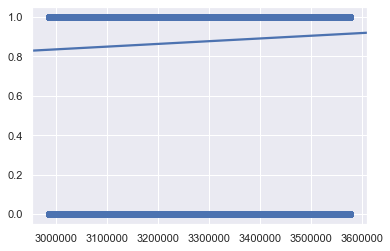

In [35]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.regplot(x=X_vis, y=Y_pred)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

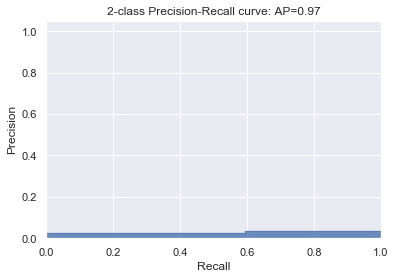

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
average_precision = 0.97
precision, recall, _ = precision_recall_curve(y, Y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.8, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))